In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Init Plugin
Init Graph Optimizer
Init Kernel
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [19]:
img_dir = '/Users/adityavs14/Documents/Internship/Pianalytix/Month 2/WeedDetection/ML_model/dataset'

In [20]:
BATCH_SIZE = 128
IMAGE_SIZE = 128
input_shape = (128,128,3)

In [21]:
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split = 0.2)

In [22]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=True,
                                        class_mode = "categorical",
                                        subset = "training")

Found 12270 images belonging to 4 classes.


In [23]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=True,
                                        class_mode = "categorical",
                                        subset = "validation")

Found 3066 images belonging to 4 classes.


In [24]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['broadleaf', 'grass', 'soil', 'soybean']


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [33]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9

In [35]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=20,validation_data=val_gen,steps_per_epoch = len(train_gen),validation_steps = len(val_gen))

Epoch 1/20
96/96 [==============================] - 39s 411ms/step - loss: 0.7625 - accuracy: 0.6835 - val_loss: 0.3965 - val_accuracy: 0.8353
Epoch 2/20
96/96 [==============================] - 39s 404ms/step - loss: 0.4167 - accuracy: 0.8347 - val_loss: 0.3117 - val_accuracy: 0.8810
Epoch 3/20
96/96 [==============================] - 39s 407ms/step - loss: 0.3310 - accuracy: 0.8699 - val_loss: 0.2831 - val_accuracy: 0.8878
Epoch 4/20
96/96 [==============================] - 39s 411ms/step - loss: 0.2816 - accuracy: 0.8956 - val_loss: 0.2456 - val_accuracy: 0.9100
Epoch 5/20
96/96 [==============================] - 39s 405ms/step - loss: 0.2490 - accuracy: 0.9033 - val_loss: 0.2091 - val_accuracy: 0.9292
Epoch 6/20
96/96 [==============================] - 39s 406ms/step - loss: 0.2322 - accuracy: 0.9117 - val_loss: 0.1956 - val_accuracy: 0.9312
Epoch 7/20
96/96 [==============================] - 39s 406ms/step - loss: 0.2026 - accuracy: 0.9230 - val_loss: 0.1803 - val_accuracy: 0.9344

<AxesSubplot:>

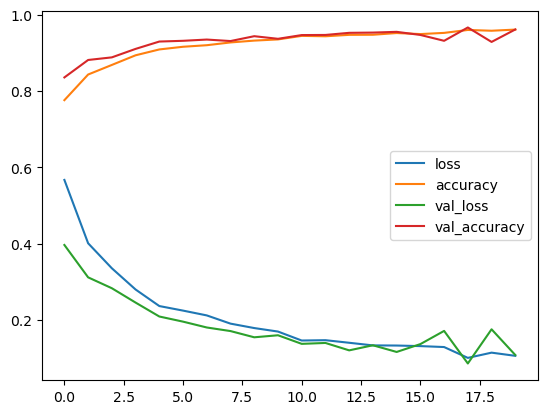

In [36]:
pd.DataFrame(history.history).plot()

In [37]:
model.save('WeedDetect.h5')

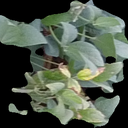

3


In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,128, 128, 3), dtype=np.float32)
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Month 2/WeedDetection/ML_model/dataset/soil/45.tif')
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Month 2/WeedDetection/ML_model/dataset/broadleaf/45.tif')
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Month 2/WeedDetection/ML_model/dataset/grass/45.tif')
image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Month 2/WeedDetection/ML_model/dataset/soybean/45.tif')
size = (128, 128)
#image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)

data = image_array.reshape((-1,128,128,3))/255


print(np.argmax(model.predict(data)))